## Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

## Generating Data

In [9]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [18]:
! kaggle datasets download -d whenamancodes/students-performance-in-exams

students-performance-in-exams.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
! unzip students-performance-in-exams.zip

Archive:  students-performance-in-exams.zip
replace exams.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: exams.csv               


In [67]:
df = pd.read_csv("exams.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


## Data Visualization

In [68]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


In [88]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [69]:
df.shape

(1000, 8)

In [70]:
m = 1000

In [71]:
X,y = df['reading score'],df['writing score']

In [72]:
type(X)

pandas.core.series.Series

In [73]:
X=np.array(X)

In [74]:
type(X)

numpy.ndarray

In [75]:
y=np.array(y)

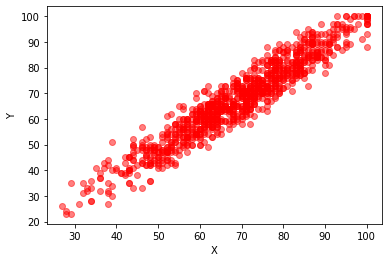

In [76]:
from matplotlib import pyplot as plt
plt.scatter(X,y, c = "red",alpha=.5, marker = 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## A basic idea of components of Linera Regression

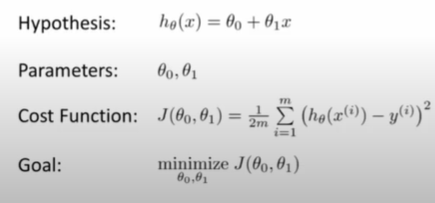

## Linear Model

In [77]:
X=np.asmatrix(X)

In [78]:
import numpy as np

In [79]:
# In the following code, we will have to depict the hypothesis i.e.
# w0 + w1 * x

def h(X,w):
    return ( w[1]*np.array(X[:,0]) + w[0] )

## Cost Function

In [80]:
def cost(w,X,y):
    return (.5/m) * np.sum(np.square(h(X,w)-np.array(y)))

## Gradient Descent

In [81]:
def grad(w,X,y):
    g = [0]*2
    g[0] = (1/m) * np.sum(h(X,w) - np.array(y))
    g[1] = (1/m) * np.sum( (h(X,w) - np.array(y)) * np.array(X[:,0]) )
    return g

In [94]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev,X,y))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev,X,y)[0]
        w1 = w_prev[1] - lr*grad(w_prev,X,y)[1]
        w_new = [w0, w1]

        print(w_new)
        print(cost(w_new,X,y))

        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= pow(10,-4):
            break
        if j>100: 
            # Here j is the number of iterations
            break
        j+=1  

## Parameter Initialization

In [95]:
w = [0,-1]

## Model Training

In [96]:
w = descent(w,w,0.01)
print(w)

[0, -1]
9198.738
[1.34738, 89.27446]
17493723.42667962
[-57.802602, -3873.7743340000015]
33713844548.696957
[2538.881607800001, 170104.06772260007]
64973658118517.83
[-111455.55520242004, -7467523.198562143]
1.2521788366235458e+17
[4892900.220766239, 327824313.791338]
2.413211575729261e+20
[-214798318.3442579, -14391487330.065283]
4.6507654808611894e+23
[9429646176.660305, 631786293835.2404]
8.963001742370496e+26
[-413961467154.0399, -27735418299321.68]
1.727358658791384e+30
[18172908408063.703, 1217584863340267.0]
3.328982880809343e+33
[-797790679113995.0, -5.345197550063768e+16]
6.415649097724576e+36
[3.5023010813104384e+16, 2.3465417244779945e+18]
1.2364303097625782e+40
[-1.5375101746952837e+18, -1.0301318170458395e+20]
2.3828608572775387e+43
[6.749669666912291e+19, 4.5222786768312357e+21]
4.592273272753844e+46
[-2.963104983774498e+21, -1.9852803391289118e+23]
8.850274973983927e+49
[1.3008030878770034e+23, 8.715380688775919e+24]
1.7056338432611557e+53
[-5.71052555578004e+24, -3.8260

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-80-406df0775921>:2: RuntimeWarning: overflow encountered in square
  return (.5/m) * np.sum(np.square(h(X,w)-np.array(y)))
<ipython-input-94-7761a275d4e5>:14: RuntimeWarning: overflow encountered in double_scalars
  if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= pow(10,-4):
